In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [2]:
expectancy = pd.read_csv('Code\who_life_exp.csv')
expectancy

,country,country_code,region,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,...,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_poverty,une_edu_spend,une_literacy,une_school
0,Angola,AGO,Africa,2000,47.33730,14.73400,383.5583,0.137985,0.025695,1.47439,...,1.90860,16395.473,122.2,46.522,1.0,2530.0,32.3,2.60753,NaN,NaN
1,Angola,AGO,Africa,2001,48.19789,14.95963,372.3876,0.133675,0.024500,1.94025,...,4.48352,16945.753,118.9,47.059,1.1,2630.0,NaN,NaN,67.40542,NaN
2,Angola,AGO,Africa,2002,49.42569,15.20010,354.5147,0.128320,0.023260,2.07512,...,3.32946,17519.417,115.1,47.702,1.2,3180.0,NaN,NaN,NaN,NaN
3,Angola,AGO,Africa,2003,50.50266,15.39144,343.2169,0.122040,0.021925,2.20275,...,3.54797,18121.479,110.8,48.440,1.3,3260.0,NaN,NaN,NaN,NaN
4,Angola,AGO,Africa,2004,51.52863,15.56860,333.8711,0.115700,0.020545,2.41274,...,3.96720,18758.145,106.2,49.263,1.3,3560.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3106,Lao People's Democratic Republic,LAO,Western Pacific,2012,64.49448,16.57977,209.2666,0.055840,0.004845,6.29833,...,2.07638,6444.530,47.5,65.267,0.3,4570.0,22.7,1.82147,NaN,NaN
3107,Lao People's Democratic Republic,LAO,Western Pacific,2013,64.79716,16.64219,205.1459,0.055350,0.004600,6.42186,...,2.39985,6541.304,45.6,65.717,0.3,4980.0,NaN,3.23381,NaN,NaN
3108,Lao People's Democratic Republic,LAO,Western Pacific,2014,65.10757,16.70787,200.8204,0.054585,0.004405,6.64447,...,2.29846,6639.756,43.7,66.144,0.3,5440.0,NaN,2.93781,NaN,NaN
3109,Lao People's Democratic Republic,LAO,Western Pacific,2015,65.45008,16.77074,196.6613,0.053465,0.004160,6.83826,...,2.45366,6741.164,42.0,66.546,0.3,5810.0,NaN,NaN,84.66104,NaN


In [3]:
expectancy.shape

(3111, 32)

In [4]:
expectancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3111 entries, 0 to 3110
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          3111 non-null   object 
 1   country_code     3111 non-null   object 
 2   region           3111 non-null   object 
 3   year             3111 non-null   int64  
 4   life_expect      3111 non-null   float64
 5   life_exp60       3111 non-null   float64
 6   adult_mortality  3111 non-null   float64
 7   infant_mort      3111 non-null   float64
 8   age1-4mort       3111 non-null   float64
 9   alcohol          3061 non-null   float64
 10  bmi              3077 non-null   float64
 11  age5-19thinness  3077 non-null   float64
 12  age5-19obesity   3077 non-null   float64
 13  hepatitis        2542 non-null   float64
 14  measles          3092 non-null   float64
 15  polio            3092 non-null   float64
 16  diphtheria       3092 non-null   float64
 17  basic_water   

In [5]:
expectancy.columns

Index(['country', 'country_code', 'region', 'year', 'life_expect',
       'life_exp60', 'adult_mortality', 'infant_mort', 'age1-4mort', 'alcohol',
       'bmi', 'age5-19thinness', 'age5-19obesity', 'hepatitis', 'measles',
       'polio', 'diphtheria', 'basic_water', 'doctors', 'hospitals',
       'gni_capita', 'gghe-d', 'che_gdp', 'une_pop', 'une_infant', 'une_life',
       'une_hiv', 'une_gni', 'une_poverty', 'une_edu_spend', 'une_literacy',
       'une_school'],
      dtype='object')

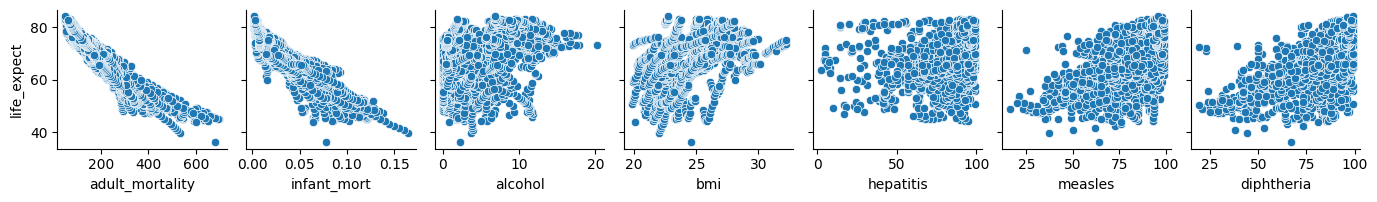

In [6]:
# Using pairplot we'll visualize the data for correlation
sns.pairplot(data=expectancy, x_vars=['adult_mortality', 'infant_mort', 'alcohol',
       'bmi', 'hepatitis', 'measles', 'diphtheria'],
             y_vars='life_expect',height=2, aspect=1, kind='scatter')
plt.show()

In [7]:
cor_table=expectancy[['life_expect','adult_mortality', 'infant_mort', 'alcohol',
       'bmi', 'hepatitis', 'measles', 'diphtheria']].corr()

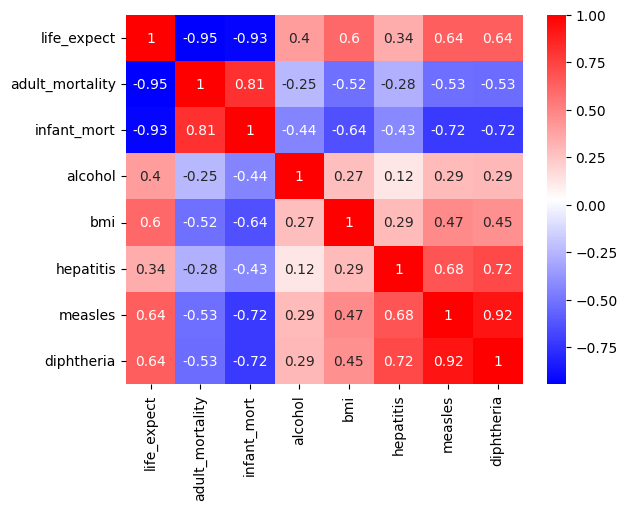

In [8]:
# Visualizing the data using heatmap
sns.heatmap(cor_table, cmap="bwr", annot = True)
plt.show()

In [9]:
# Creating X and y
X = expectancy['adult_mortality']
y = expectancy['life_expect']

In [12]:
# Splitting the varaibles as training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

In [11]:
# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

In [13]:
sm.OLS(y_train, X_train_sm)

In [14]:
# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

const              83.941719
adult_mortality    -0.076476
dtype: float64

In [15]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            life_expect   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                 1.832e+04
Date:                Sat, 25 Mar 2023   Prob (F-statistic):               0.00
Time:                        11:44:46   Log-Likelihood:                -5433.2
No. Observations:                2177   AIC:                         1.087e+04
Df Residuals:                    2175   BIC:                         1.088e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              83.9417      0.125    673.118      0.000      83.697      84.186
adult_mortality    -0.0765      0.001   -135.356      0.000      -0.078      -0.075
==============================================================================
Omnibus:                       84.931   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              241.680
Skew:                          -0.095   Prob(JB):                     3.31e-53
Kurtosis:                       4.621   Cond. No.                         437.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

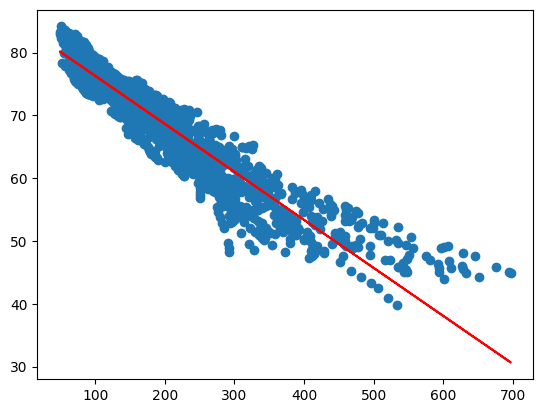

In [17]:
# Visualizing the regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, 83.941719 + -0.076476*X_train, 'r')
plt.show()

In [18]:
# Predicting y_value using traingn data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

<Figure size 640x480 with 0 Axes>

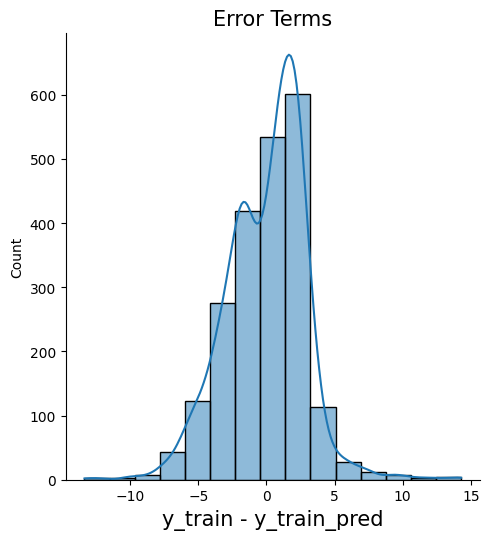

In [20]:
#Plotting the histogram using the residual values
fig = plt.figure()
sns.displot(res, bins = 15,kde=True)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

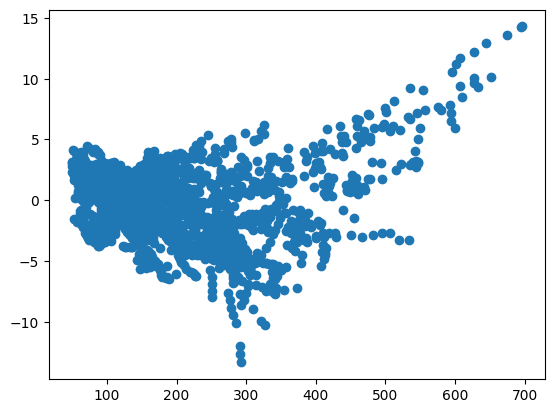

In [21]:
# Looking for any patterns in the residuals
plt.scatter(X_train,res)
plt.show()

In [22]:
# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predicting the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

# Printing the first 15 predicted values
y_test_pred

237     53.862147
743     62.809251
1919    75.824596
2648    73.918922
450     67.388536
          ...    
696     63.896698
1965    79.022301
1013    72.273030
589     48.211827
366     67.492322
Length: 934, dtype: float64

In [23]:
# Checking the R-squared value
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.8989493438659595

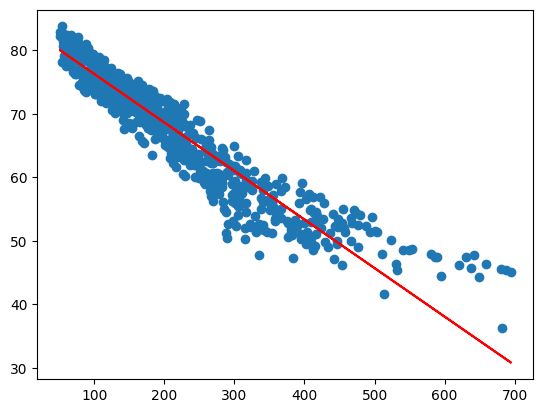

In [24]:
# Visualize the line on the test set
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()